# Исследование значений признаков

In [1]:
import pandas as pd

from eda_utils import plot_nulls, show_circles_on_map, plot_feature_for_rooms, plot_numerical_feature

pd.set_option('display.max_columns', 60)

In [2]:
df = pd.read_csv('houseprices.csv')
print(f"Размер датафрейма: {df.shape}")
df.sample(5)

Размер датафрейма: (43256, 44)


,ID,Ссылка,Цена,Дата,Адрес,Этаж,Количество_комнат,Балкон_или_лоджия,Тип_комнат,Общая_площадь,Жилая_площадь,Площадь_кухни,Высота_потолков,Санузел,Окна,Ремонт,Мебель,Тёплый_пол,Отделка,Техника,Способ_продажи,Вид_сделки,Тип_дома,В_доме,Год_постройки,Этажей_в_доме,Пассажирский_лифт,Грузовой_лифт,Парковка,Двор,Название_новостройки,Корпус_строение,Официальный_застройщик,Тип_участия,Срок_сдачи,Метро_1,Метро_2,Метро_3,Расстояние_до_метро_1,Расстояние_до_метро_2,Расстояние_до_метро_3,Широта,Долгота,Запланирован_снос
39357,2804159025,https://avito.ru//moskva/kvartiry/3-k._kvartir...,35990000,2023-01-13,"Москва, 4-я Тверская-Ямская ул., 25",2.0,3,NaN,изолированные,81.7,63.7,8.7,3м,раздельный,во двор,требует ремонта,NaN,NaN,NaN,NaN,свободная,NaN,кирпичный,NaN,1927.0,5.0,1,NaN,за шлагбаумом во дворе,"закрытая территория, детская площадка",NaN,NaN,NaN,NaN,NaN,Маяковская,Новослободская,Белорусская,5.0,15.0,15.0,55.773094,37.595591,NaN
37414,2599161226,https://avito.ru//moskva/kvartiry/5-k._kvartir...,287000000,2023-01-09,"Москва, 1-й пер. Тружеников, 17А",4.0,5,NaN,изолированные,238.5,NaN,21.0,NaN,совмещенный,NaN,евро,NaN,NaN,NaN,NaN,свободная,NaN,монолитный,NaN,2009.0,7.0,NaN,NaN,подземная,"закрытая территория, детская площадка, спортив...",NaN,NaN,NaN,NaN,NaN,Киевская,Фрунзенская,Парк культуры,15.0,15.0,20.0,55.736833,37.574004,NaN
28534,2666398792,https://avito.ru//moskva/kvartiry/1-k._apartam...,10500000,2023-01-12,"пос. Мосрентген, Бизнес-парк Г10, корп. 1.1",16.0,1,лоджия,NaN,36.6,25.6,6.0,3м,совмещенный,"во двор, на улицу, на солнечную сторону",NaN,NaN,NaN,чистовая,NaN,переуступка,NaN,монолитный,NaN,NaN,16.0,1,2,NaN,"закрытая территория, детская площадка, спортив...",Комплекс апартаментов Тропарево Парк,Корпус 1.1,ООО СЗ Самолет Дудкино,ДДУ по ФЗ 214,"4 кв. 2022 года, сдача не подтверждена",Румянцево,Тропарёво,Саларьево,15.0,31.0,31.0,55.633990,37.454980,NaN
10870,2504259461,https://avito.ru//moskva/kvartiry/3-k._kvartir...,11030240,2023-01-01,"пос. Сосенское, дер. Столбово, стр. 18-19",14.0,3,балкон,изолированные,52.0,33.9,5.1,2.8м,NaN,во двор,NaN,NaN,NaN,чистовая,NaN,NaN,NaN,монолитный,NaN,NaN,16.0,NaN,NaN,NaN,NaN,ЖК ЭкоБунино,Корпус 1819,ООО Специализированный Застройщик МИЦМИЦ,ДДУ по ФЗ 214,4 кв. 2024 года,Коммунарка,Ольховая,Бунинская аллея,31.0,31.0,31.0,55.541690,37.457030,NaN
19633,2706063971,https://avito.ru//moskva/kvartiry/3-k._kvartir...,20000000,2023-01-05,"Москва, улица Гончарова, 13",2.0,3,NaN,"изолированные, смежные",55.5,35.0,7.6,3м,раздельный,NaN,требует ремонта,NaN,NaN,NaN,NaN,свободная,NaN,кирпичный,NaN,1951.0,4.0,NaN,NaN,NaN,детская площадка,NaN,NaN,NaN,NaN,NaN,Тимирязевская,Фонвизинская,Бутырская,15.0,15.0,15.0,55.815463,37.586158,NaN


### Базовая информация

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43256 entries, 0 to 43255
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43256 non-null  int64  
 1   Ссылка                  43256 non-null  object 
 2   Цена                    43256 non-null  int64  
 3   Дата                    43256 non-null  object 
 4   Адрес                   43256 non-null  object 
 5   Этаж                    43243 non-null  float64
 6   Количество_комнат       43243 non-null  object 
 7   Балкон_или_лоджия       19206 non-null  object 
 8   Тип_комнат              24314 non-null  object 
 9   Общая_площадь           43243 non-null  float64
 10  Жилая_площадь           30373 non-null  float64
 11  Площадь_кухни           33852 non-null  float64
 12  Высота_потолков         22401 non-null  object 
 13  Санузел                 35176 non-null  object 
 14  Окна                    25894 non-null

In [4]:
df.describe()

,ID,Цена,Этаж,Общая_площадь,Жилая_площадь,Площадь_кухни,Год_постройки,Этажей_в_доме,Расстояние_до_метро_1,Расстояние_до_метро_2,Расстояние_до_метро_3,Широта,Долгота
count,4.325600e+04,4.325600e+04,43243.000000,43243.000000,30373.000000,33852.000000,20141.000000,43243.000000,41009.000000,40677.000000,40235.000000,43256.000000,43256.000000
mean,2.607539e+09,2.596721e+07,8.595033,59.522283,33.261973,12.787871,1940.979048,17.144532,27.083323,26.227352,31.402411,55.732804,37.575219
std,1.775262e+08,5.085229e+07,8.382272,51.106374,27.849379,7.752922,301.398023,11.479926,144.037399,73.818788,87.934888,0.099696,0.133802
min,5.261919e+07,1.000000e+00,1.000000,10.000000,5.000000,2.000000,0.000000,1.000000,5.000000,5.000000,5.000000,55.473810,36.917080
25%,2.531211e+09,8.488206e+06,2.000000,34.000000,18.000000,8.000000,1968.000000,9.000000,10.000000,15.000000,30.000000,55.672241,37.485687
50%,2.646256e+09,1.334575e+07,6.000000,48.200000,28.000000,10.200000,1981.000000,15.000000,15.000000,30.000000,30.000000,55.736579,37.577660
75%,2.721478e+09,2.380000e+07,12.000000,70.200000,40.800000,16.000000,2014.000000,22.000000,20.000000,30.000000,31.000000,55.801489,37.655896
max,2.900753e+09,2.112193e+09,94.000000,1315.000000,1050.000000,100.000000,2025.000000,97.000000,1905.000000,1905.000000,1905.000000,56.031337,37.974563


In [5]:
df.describe(include='object')

,Ссылка,Дата,Адрес,Количество_комнат,Балкон_или_лоджия,Тип_комнат,Высота_потолков,Санузел,Окна,Ремонт,Мебель,Тёплый_пол,Отделка,Техника,Способ_продажи,Вид_сделки,Тип_дома,В_доме,Пассажирский_лифт,Грузовой_лифт,Парковка,Двор,Название_новостройки,Корпус_строение,Официальный_застройщик,Тип_участия,Срок_сдачи,Метро_1,Метро_2,Метро_3,Запланирован_снос
count,43256,43256,43256,43243,19206,24314,22401,35176,25894,31554,7599,1883,10661,6374,32927,19851,43243,14671,25822,18635,22022,21295,11000,9044,10998,10998,10998,40484,42873,42712,348
unique,43256,49,16160,12,3,3,137,3,7,4,7,1,3,78,5,5,7,7,9,5,15,7,289,478,295,2,27,246,249,249,1
top,https://avito.ru//moskva/kvartiry/apartamenty-...,2023-01-06,"ул. Автозаводская, вл. 23",2,балкон,изолированные,2.7м,совмещенный,во двор,косметический,"кухня, хранение одежды, спальные места",есть,без отделки,"холодильник, стиральная машина",свободная,возможна ипотека,монолитный,мусоропровод,1,1,открытая во дворе,"детская площадка, спортивная площадка",Район Новые Ватутинки,Корпус 1,ООО ЛСР. ОбъектМ,ДДУ по ФЗ 214,1 кв. 2024 года,Аминьевская,нет,нет,да
freq,1,3943,514,12852,10302,21354,4176,21698,13771,9867,4945,1883,6020,1599,30076,19649,18899,9194,15909,12768,12210,8275,760,622,586,10040,1320,939,2196,2477,348


### Пропущенные значения


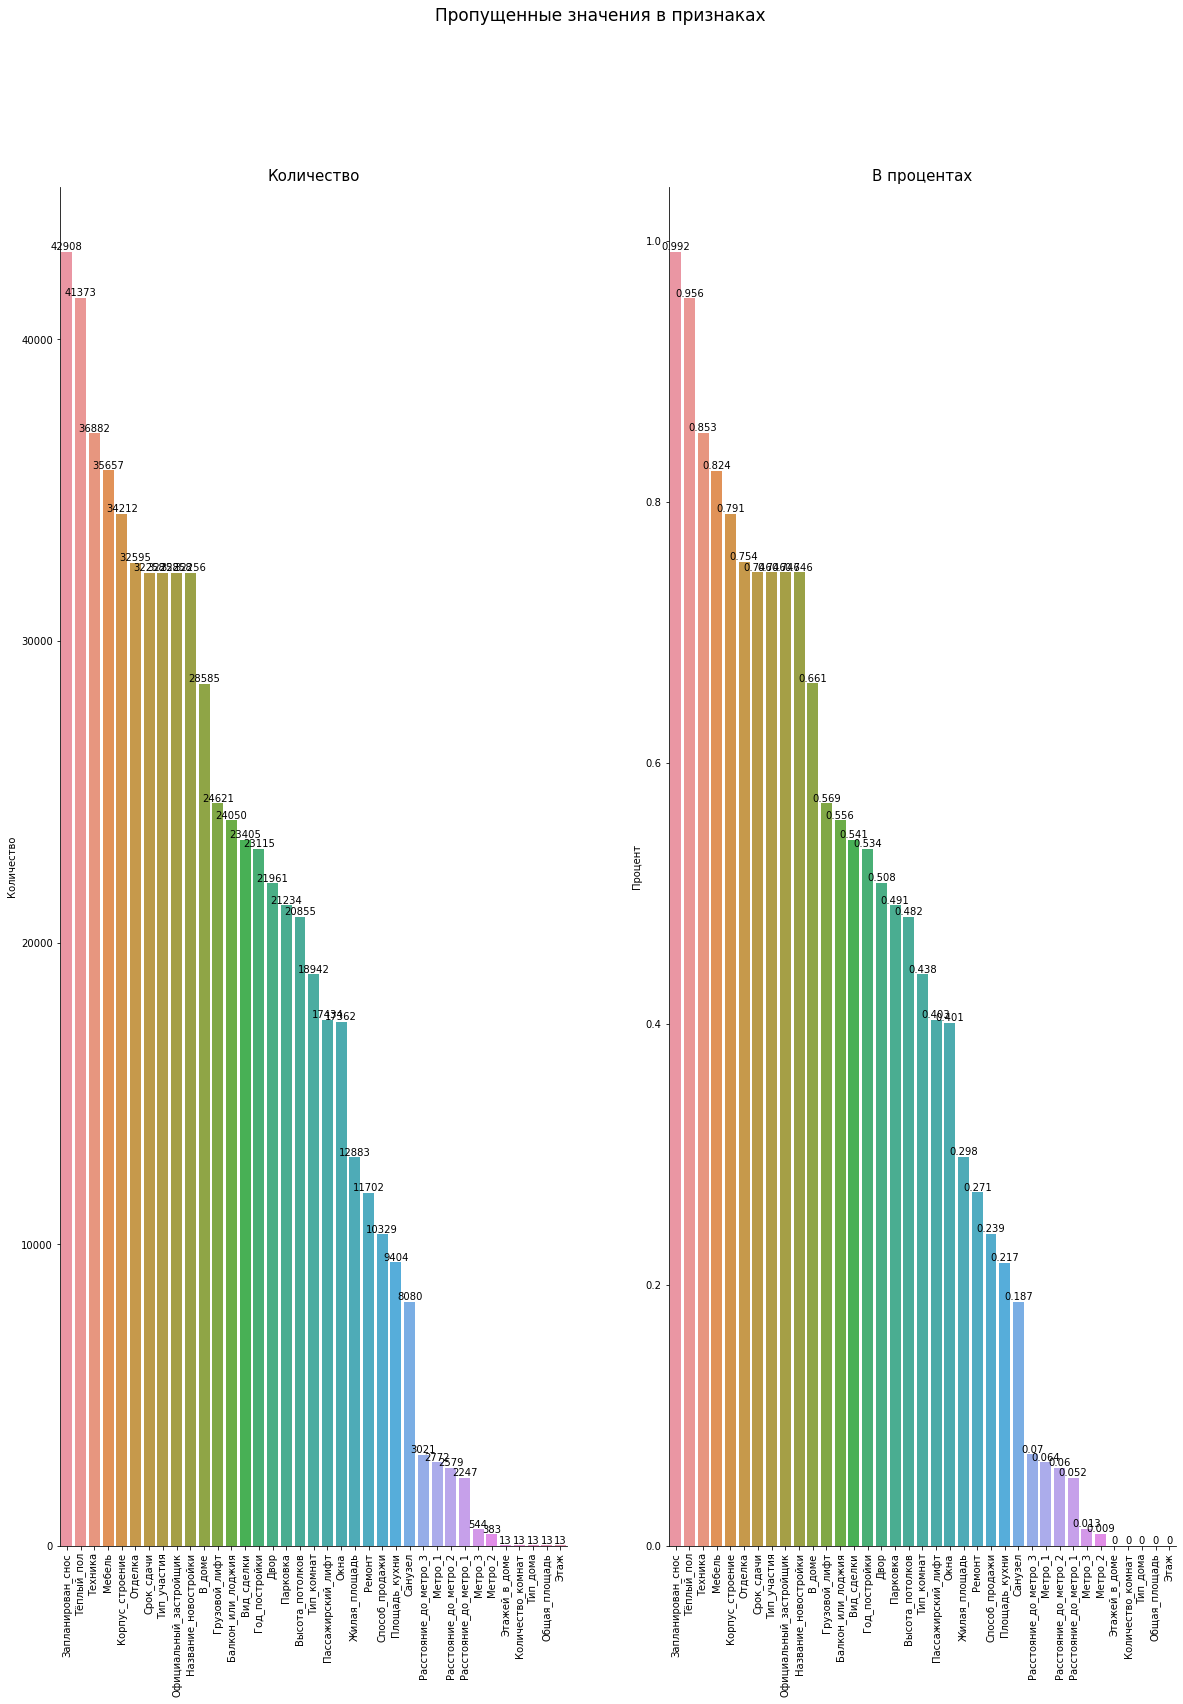

In [6]:
plot_nulls(df, figsize=(20, 25), title_size=17)

*  в наборе данных присутствуют объявления о продаже квартир в домах под снос, их необходимо удалить
*  признак Теплый пол содержит большое количество пропущенных значений, его также необходимо удалить
*  в набор данных также попали объявления о продаже квартир в новостройках, их стоимость будет отличаться от стоимости вторичного жилья, такие объявления также необходимо удалить

## Координаты

In [7]:
#show_circles_on_map(df, 'Широта', 'Долгота', color='blue')

В наборе данных присутсвуют объявления о продаже квартир, находящихся на большом удалении от центра Москвы, например, в Зеленограде или Селятино. Такие объявения необходимо удалить, поскольку стоимость квартир в них будет ниже, чем в среднем по Москве На графике представлено сравнение цен в Зеленограде по сравнению с Москвой Синий цвет - Зеленоград Красный - Москва ![image](https://www.irn.ru/graph/services/compare.php?period=2&index=IS&grnum=1&currency=0&mos=on&geo_list=122)

### Площадь квартиры в зависимости от количества комнат

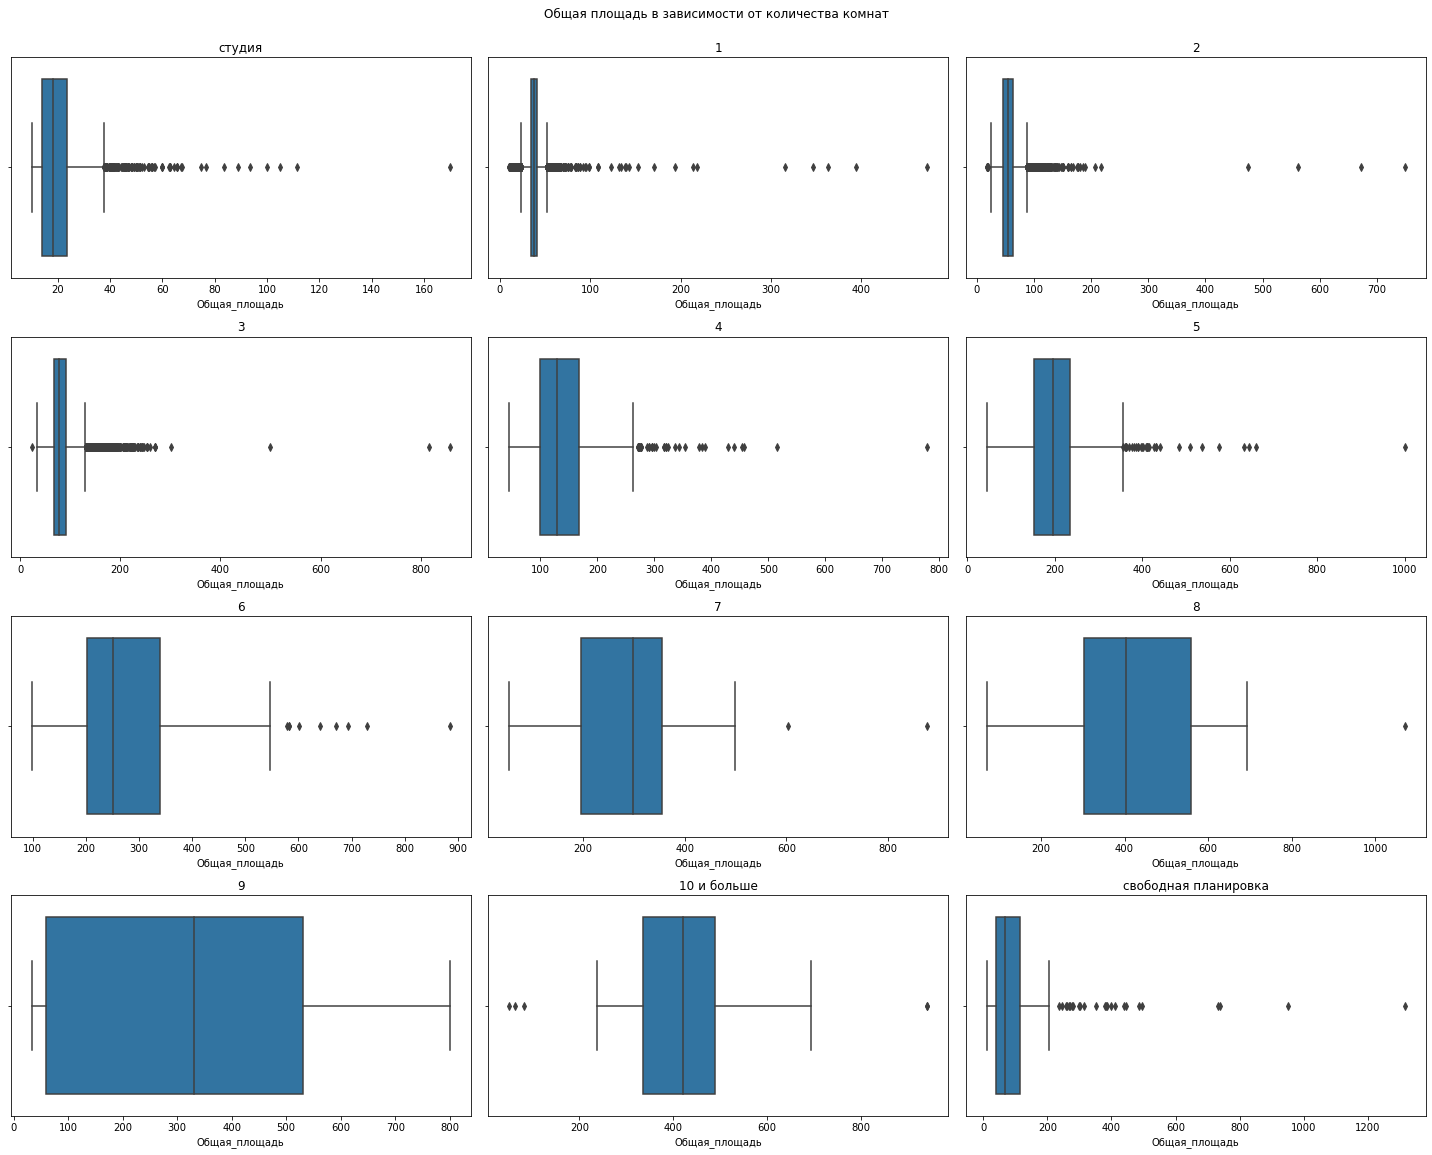

In [8]:
plot_feature_for_rooms(df, 'Общая_площадь')

*  в данных содержатся выбросы. Выборочный анализ объявлений с аномально низкой или аномально высокой общей площадью в зависимости от количества комнат показал, что в этих объявлениях неверно указаны данные, либо данные не совпадают с выпиской из ЕГРН

### Жилая площадь в зависимости от количества комнат

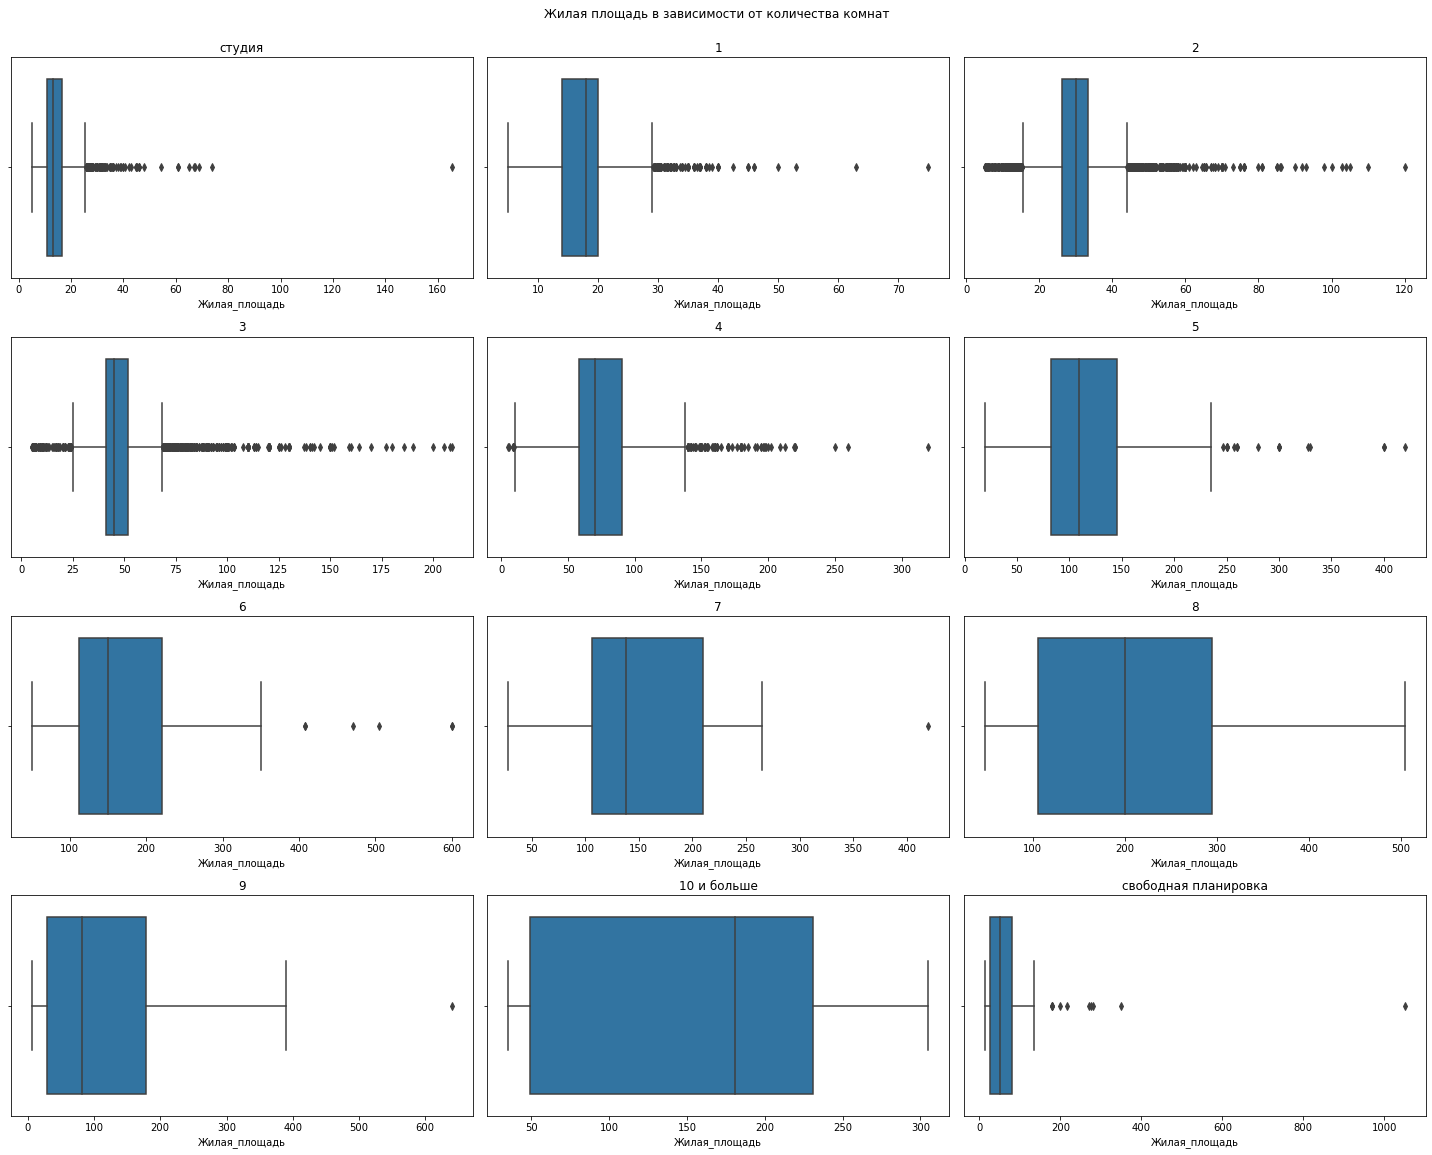

In [9]:
plot_feature_for_rooms(df, 'Жилая_площадь')

*  Также необходимо удалить выбросы

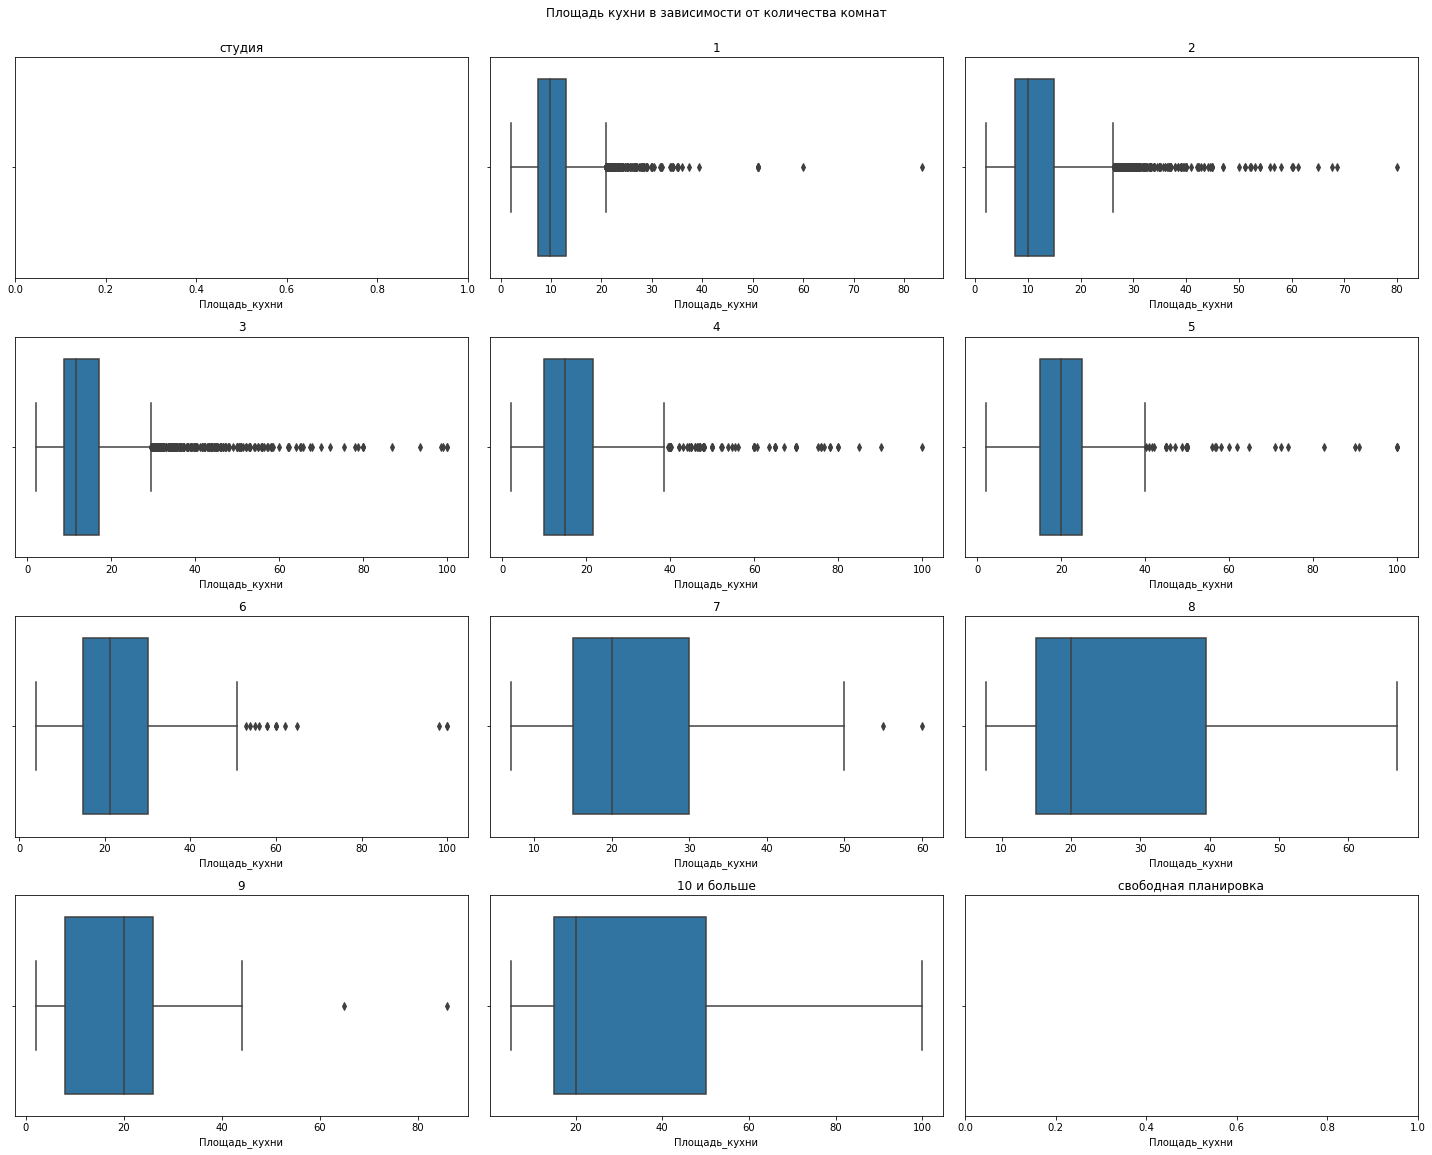

In [10]:
plot_feature_for_rooms(df, 'Площадь_кухни')

* для студий и для квартир со свободной планировкой ни в одном объявлении не указывалась площадь кухни
* также в данных присутсвуют выбросы, которые необходимо удалить

### Цена

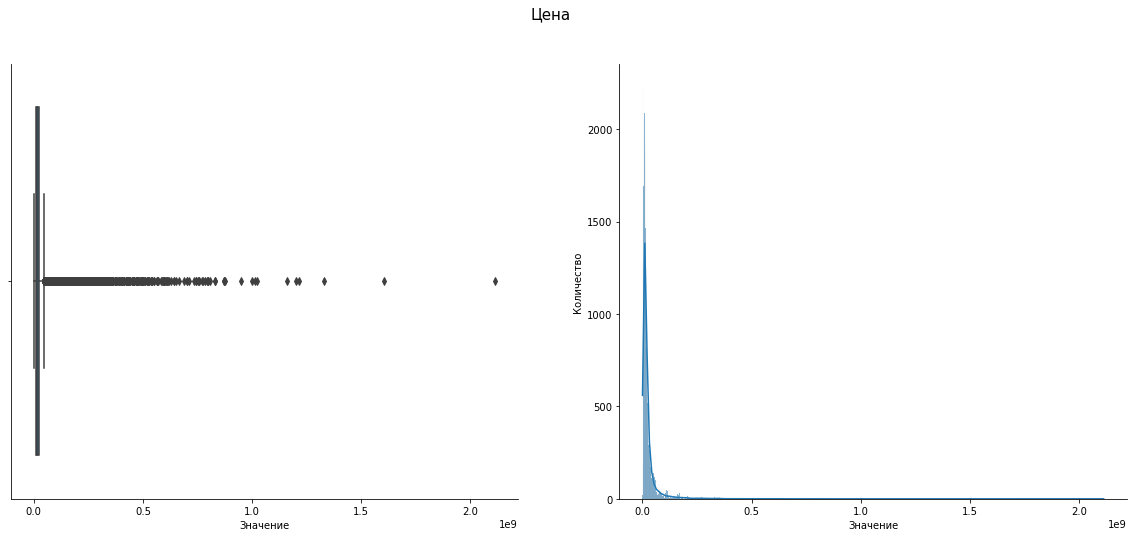

In [11]:
plot_numerical_feature(df,'Цена')

* в цене присутсвуют выбросы, которые необходимо обработать